In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns




In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df = df.drop(columns=['deck'])

In [7]:
avg = df['age'].mean()

df['age']=df['age'].fillna(avg)

In [8]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

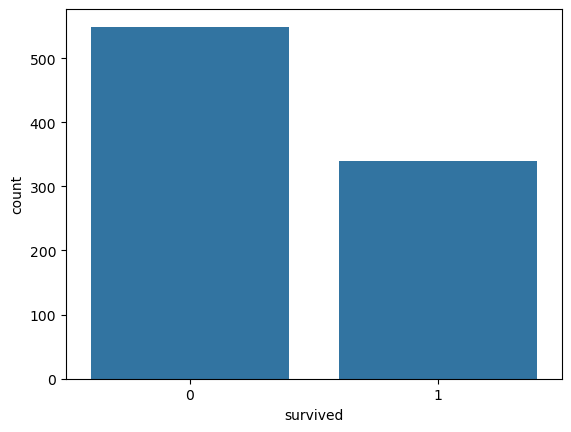

In [11]:
sns.countplot(x='survived', data=df)
plt.show()

In [12]:
df['survived'].value_counts()

survived
0    549
1    340
Name: count, dtype: int64

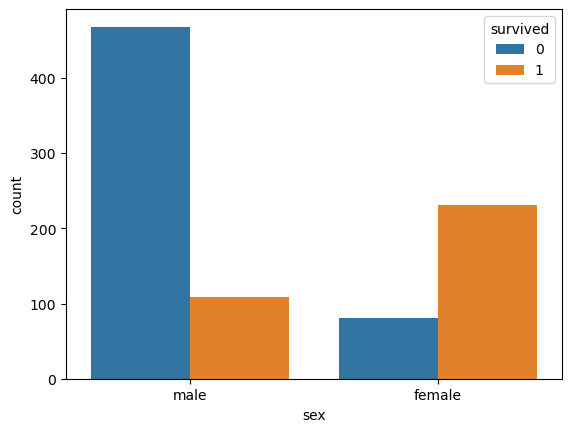

In [13]:
# x = the groups male vs female
# hue = the split died vs survived

sns.countplot(x='sex', hue='survived', data=df)
plt.show()

In [14]:
# Get the exact survival percentage
df.groupby('sex')['survived'].mean()

sex
female    0.740385
male      0.188908
Name: survived, dtype: float64

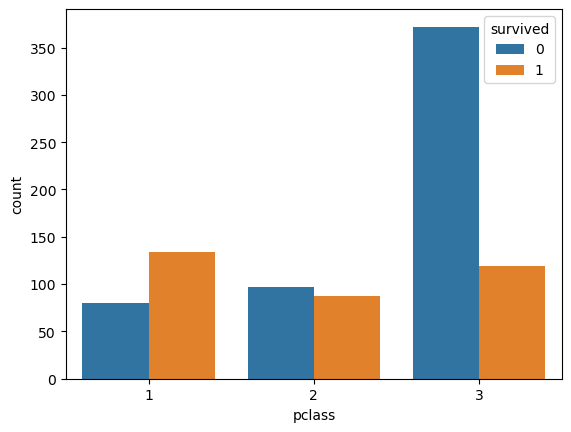

pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [15]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.show()

df.groupby('pclass')['survived'].mean()

In [16]:
gender_map = {'male':0, 'female':1}

df['sex']= df['sex'].map(gender_map)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [17]:
embarkment_map = {'S':0, 'C':1, 'Q':2}

df['embarked'] = df['embarked'].map(embarkment_map)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0,Third,man,True,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,1,First,woman,False,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,0,Third,woman,False,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,0,First,woman,False,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,0,Third,man,True,Southampton,no,True


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    int64   
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    int64   
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6), object(3)
memory usage: 86.1+ KB


In [19]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

X = df[features]
y = df['survived'] # target

print("----Info about X----")
X.info()

----Info about X----
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    889 non-null    int64  
 1   sex       889 non-null    int64  
 2   age       889 non-null    float64
 3   sibsp     889 non-null    int64  
 4   parch     889 non-null    int64  
 5   fare      889 non-null    float64
 6   embarked  889 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original X:", X.shape)
print("X_train (Study):", X_train.shape)
print("X_test (Exam):", X_test.shape)

Original X: (889, 7)
X_train (Study): (711, 7)
X_test (Exam): (178, 7)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

print("Trained the model successfully!✅")

Trained the model successfully!✅


In [22]:
predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.71      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [24]:
import pandas as pd

weights = model.coef_[0]
feature_names = X.columns

coeff_df = pd.DataFrame(weights, index=feature_names, columns=['Importance'])

print(coeff_df.sort_values(by='Importance', ascending=False))


          Importance
sex         2.617484
embarked    0.305942
fare        0.001987
age        -0.044297
parch      -0.049954
sibsp      -0.384893
pclass     -1.147539


In [ ]:
import warnings
warnings.filterwarnings('ignore')

cooper = [1, 0, 34, 0, 0, 150, 0]
murph =  [3, 1, 8, 1, 1, 20, 2]
dr_mann = [2, 0, 29, 0, 0, 100, 1] 

interstellar = [
    ["Cooper", cooper],
    ["Murph", murph],
    ["Dr. Mann", dr_mann]
]

for name, data in interstellar:
    
    prediction = model.predict([data])

    if prediction[0] == 1:
        print(name + " Survived! 🚀")
    else:
        print(name + " Died. 🧊")

  


Cooper Survived! 🚀
Murph Survived! 🚀
Dr. Mann Died. 🧊


In [33]:
import joblib

# Syntax: joblib.dump( YOUR_MODEL,  'FILENAME_YOU_WANT.pkl' )
joblib.dump(model, 'titanic_model.pkl')

print("Success!")

Success!
